# Machine Learning - Task A - SOLUTIONS

*M Kundegorski*, Fjelltopp Ltd, University of Glasgow, 2019-2020


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt  # We will use matplotlib for plotting

import pandas as pd  # We will use pandas DataFrames for storing features
import numpy as np  # We will use NumPy arrays to store image data

# Utils is a custom module written to simplify these tutorials
# You do not need to understand these codes for this practical
from utils.practice_data import generateNiceData

# Generate a pandas Dataframe with some toy results
# Each row (a cell) has four feature: A, B, C, Y
# These could, for example, be length, intensity, etc.
number_of_samples=100
problem = generateNiceData(3,number_of_samples,noNoise=True)
problem.describe()

,A,B,C,Y,Y_class
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.601583,2.437013,0.526965,4.366895,0.340000
std,2.917025,1.410324,0.281716,8.141881,0.945163
min,0.088107,0.114851,0.002073,-14.415644,-1.000000
25%,2.103866,1.237830,0.325339,-2.720653,-1.000000
50%,4.535519,2.537083,0.537089,5.035701,1.000000
75%,7.027309,3.627989,0.772200,10.489352,1.000000
max,9.982482,4.935666,0.999705,18.534613,1.000000


## The Task

In one experiment we were able to measure four features: A, B, C, and Y. However, in our next experiment we could only measure A, B and C.

Given these three features (A, B and C) we want to predict the value of feature Y.

1. Let's start with a multivariate linear regression (assuming the relationship between our variables is simple).
2. Advanced: Following see how the performance changes with and without noise in data
3. Advanced: See how performance changes depending on size of the problem
4. Advanced: Then try to provide non-linear features (i.e. assuming the relationship between our variables is complex)

In [11]:
#Data from pandas series needs to be converted to familiar numpy arrays
x = problem.loc[:,['A','B','C']].values
y = problem.loc[:,'Y'].values

print(x.shape, y.shape)  # check our array shapes make sense

(100, 3) (100,)


## Task A.1 

Read the documentation for function [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), start with the second example provided.

In the cell below, complete the function call (by replacing all the `____`s) to split our dataset into 80% `x_train`/`y_train` (training) and 20% `x_test`/`y_test` (testing) subsets.

In [12]:
from sklearn import model_selection  # for trans_test_split function

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

## Task A.2

 Look at the [Linear Regression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) documentation and examples. In the code below, we have initialised a Linear Regression model. Add the following lines of code:
1. A line that 'fit's a model to our training data,
2. A line that 'predict's the value of Y for our test data.

What do the intercept and slope represent?

In [13]:
from sklearn import linear_model  # this submodule contains the 'LinearRegression' function

mv_regression = linear_model.LinearRegression(normalize=True) #How would it perform without normalisation?

# Fit regression model to feature data x_train and target y_train
mv_regression.fit(x_train,y_train)

# Fill vector y_predict with estimations of target y_predict from data x_test
y_predict = mv_regression.predict(x_test)

print("Intercept {}".format(mv_regression.intercept_))
print("Slope {}".format(mv_regression.coef_))

Intercept 14.13154498491038
Slope [ 0.99796324 -4.11170425 -8.73959331]


In machine learning we want to get an idea of how well our models fits our data (by comparing out prediction to our known testing data values), there are a variety of error metrics that can be used for this. Run the cell below to compare the 'True' or known values and the predicted values as well as three common error metrics. How do you interpret these numbers?

In [14]:
from sklearn import metrics

results = pd.DataFrame({'True value': y_test.flatten(), 'Predicted': y_predict.flatten()})
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_predict))  )
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_predict)) )
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))

Mean Absolute Error: 3.6006363027092774
Mean Squared Error: 17.805821110105313
Root Mean Squared Error: 4.219694433262355


Numbers are all well and good, but often it's easier to understand our results when plotted visually. Run the cell below to compare the true and predicted values for our test data.

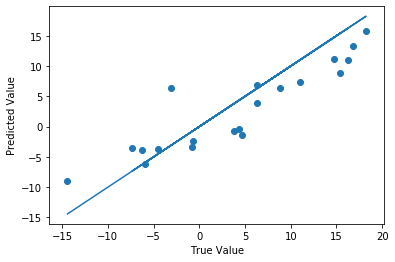

In [15]:
f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)

axis.plot(y_test, y_test, '-')  # plot true vs true, i.e. the ideal case
axis.scatter(y_test,y_predict)  # plot a scatter of the true value against the prediction value
axis.set_ylabel('Predicted Value')
axis.set_xlabel('True Value')

plt.show()

## Advanced Task A.3

In the cell below we have put all this code into a loop. Using `np.arange` we have defined a range of sample sizes. Run the loop to see how sample size affects the results.

So far, these experiments have been magically noise free. Make `noNoise=False` and re-run the cell. How does noise affect the results?

Running for 20 samples...
Intercept 10.756357667305632
Slope [ 1.15674723 -0.72563013 -9.57632944]
Mean Absolute Error: 9.087455327308964
Mean Squared Error: 119.98203472085004
Root Mean Squared Error: 10.95363112035685


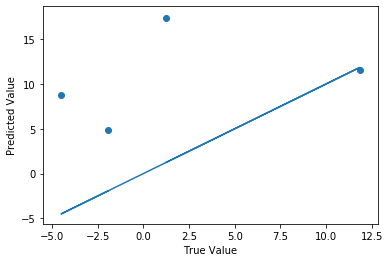

Running for 40 samples...
Intercept 14.282233075363104
Slope [ 0.5704892  -4.33855289 -3.89834069]
Mean Absolute Error: 2.383809949190841
Mean Squared Error: 9.92656395915817
Root Mean Squared Error: 3.1506450068451333


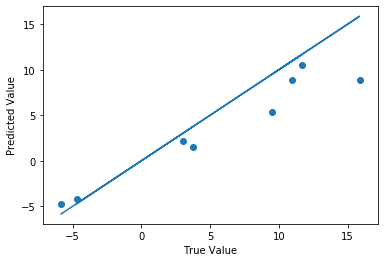

Running for 60 samples...
Intercept 14.796534297452688
Slope [ 0.89493857 -3.77087135 -9.4605787 ]
Mean Absolute Error: 2.6404766447146173
Mean Squared Error: 13.716930606176911
Root Mean Squared Error: 3.703637483093737


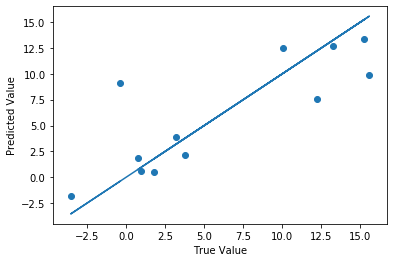

Running for 80 samples...
Intercept 18.11772336310684
Slope [ 0.91276642 -5.2213443  -8.11224628]
Mean Absolute Error: 3.388229940379815
Mean Squared Error: 20.248984848717072
Root Mean Squared Error: 4.499887203999348


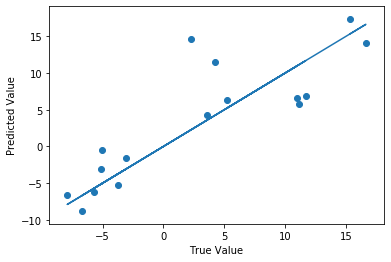

Running for 100 samples...
Intercept 13.986001199280123
Slope [ 0.96476679 -4.21835116 -7.15264286]
Mean Absolute Error: 3.194333803373437
Mean Squared Error: 12.720933219032904
Root Mean Squared Error: 3.5666417284376775


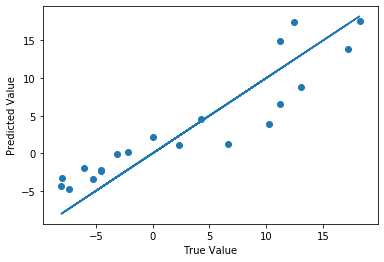

Running for 120 samples...
Intercept 12.678473514816012
Slope [ 0.75546297 -3.6579523  -5.04247324]
Mean Absolute Error: 4.156588706999936
Mean Squared Error: 21.7803238363792
Root Mean Squared Error: 4.666939450687056


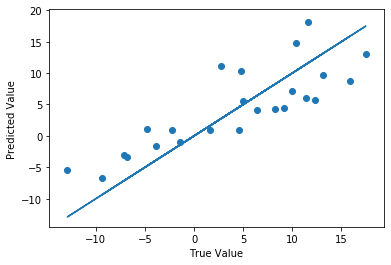

Running for 140 samples...
Intercept 14.042075272709962
Slope [ 1.10846429 -4.43046483 -7.15287719]
Mean Absolute Error: 2.989783512842923
Mean Squared Error: 13.896775518900656
Root Mean Squared Error: 3.7278379147839376


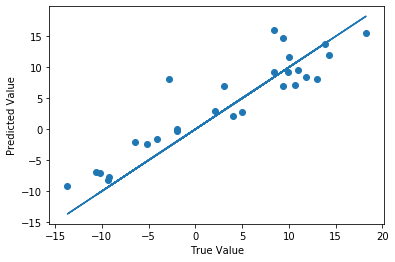

Running for 160 samples...
Intercept 13.856801754792745
Slope [ 0.98631321 -4.32941785 -7.24305568]
Mean Absolute Error: 3.446146774194837
Mean Squared Error: 18.577549125147335
Root Mean Squared Error: 4.310168108687565


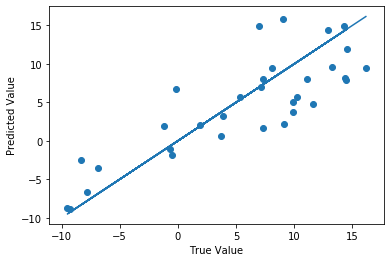

Running for 180 samples...
Intercept 13.049633785928117
Slope [ 0.85811179 -3.84262993 -7.81316783]
Mean Absolute Error: 3.4573526293624592
Mean Squared Error: 16.88723635045912
Root Mean Squared Error: 4.109408272544737


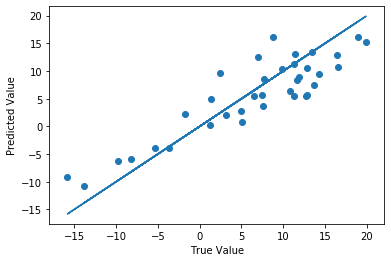

,MAE,MSE,RMS
20,9.08746,119.982,10.9536
40,2.38381,9.92656,3.15065
60,2.64048,13.7169,3.70364
80,3.38823,20.249,4.49989
100,3.19433,12.7209,3.56664
120,4.15659,21.7803,4.66694
140,2.98978,13.8968,3.72784
160,3.44615,18.5775,4.31017
180,3.45735,16.8872,4.10941


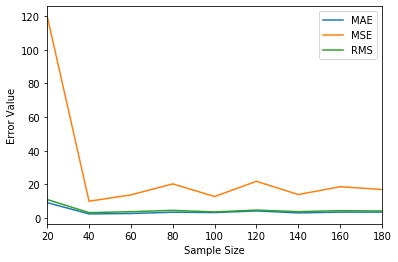

In [16]:
# We will store the error metrics for each sample size
errors = pd.DataFrame(index=np.arange(20, 200, 20),columns=['MAE', 'MSE', 'RMS'])

for number_of_samples in np.arange(20, 200, 20):
    print('Running for {0} samples...'.format(number_of_samples))
    problem = generateNiceData(3,number_of_samples,noNoise=True)
    
    #Data from pandas series needs to be converted to familiar numpy arrays
    x = problem.loc[:,['A','B','C']].values
    y = problem.loc[:,'Y'].values
    
    # Split test/train data
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)
    
    # Initialise Linear Regression Model
    mv_regression = linear_model.LinearRegression(normalize=True) #How would it perform without normalisation?
    
    # Fit regression model to feature data x_train and target y_train
    mv_regression.fit(x_train,y_train)
    
    # Fill vector y_predict with estimations of target y_predict from data x_test
    y_predict = mv_regression.predict(x_test)
    
    # Print Fit
    print("Intercept {}".format(mv_regression.intercept_))
    print("Slope {}".format(mv_regression.coef_))
    
    # Print Error Metrics
    results = pd.DataFrame({'True value': y_test.flatten(), 'Predicted': y_predict.flatten()})
    print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_predict)))
    errors.loc[number_of_samples,'MAE'] = metrics.mean_absolute_error(y_test, y_predict)
    print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_predict)))
    errors.loc[number_of_samples,'MSE'] = metrics.mean_squared_error(y_test, y_predict)
    print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))
    errors.loc[number_of_samples,'RMS'] = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
    
    # Plot
    f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)
    axis.plot(y_test, y_test, '-')  # plot true vs true, i.e. the ideal case
    axis.scatter(y_test,y_predict)  # plot a scatter of the true value against the prediction value
    axis.set_ylabel('Predicted Value')
    axis.set_xlabel('True Value')
    
    plt.show()
    
# Show errors and create a quick plot
display(errors)

fErr, axErr = plt.subplots(1,1)  # create a figure with a single axis (subplot)

errors.plot(ax=axErr)
axErr.set_ylabel('Error Value')
axErr.set_xlabel('Sample Size')

plt.show()

## Advanced Task A.4

Given your extensive knowledge of the property Y, you suspect that measurement B and C have a non-linear relation to Y. 

Modify the following cell to use function [np.power()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html) and [np.sin()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html?highlight=sin#numpy.sin) to create additional non-linear features z_b and z_c. 

*Hint:* try different powers of `x_b`, from 2 to 8 to see when the fit is the closest. 

*Hint:* Apply sine function firectly to `x_c: z_c = np.sin(x_c)`

In [17]:
x_a = problem.loc[:,['A']].values
x_b = problem.loc[:,['B']].values
x_c = problem.loc[:,['C']].values

#z_b = x_b
#z_c = x_c 

z_b = np.power(x_b,4)
z_c = np.sin(x_c)

#You can either add z-features to your existing measurements, or replace x_b and x_c with the non-linear features.
x=np.concatenate((x_a,x_b,x_c,z_b,z_c),axis=1)
x=np.concatenate((x_a,z_b,z_c),axis=1)

## Advanced Task A.5

Copy the code from the cells above (task A.2) to try linear regression with your non-linear features. Do you need to change anything?

## Advanced Task A.6

Display the results on the test dataset by executing the following cell

Mean Absolute Error: 3.4573526293624592
Mean Squared Error: 16.88723635045912
Root Mean Squared Error: 4.109408272544737


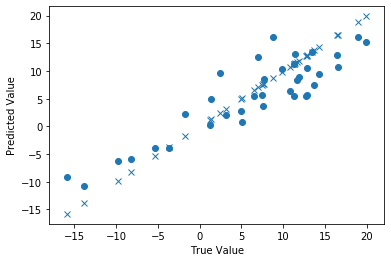

In [18]:
from sklearn import metrics

results = pd.DataFrame({'True value': y_test.flatten(), 'Predicted': y_predict.flatten()})
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_predict))  )
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_predict)) )
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))

import matplotlib.pyplot as plt

f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)

axis.plot(y_test, y_test, 'x')  # plot true vs true, i.e. the ideal case
axis.scatter(y_test,y_predict)  # plot a scatter of the true value against the prediction value
axis.set_ylabel('Predicted Value')
axis.set_xlabel('True Value')

plt.show()